<a href="https://colab.research.google.com/github/sonicfsw/Check_ULP-R-_722-1/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_3_2_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт данных

https://www.kaggle.com/datasets/miroslavsabo/young-people-survey/data?select=responses.csv

In [ ]:
!kaggle datasets download -d miroslavsabo/young-people-survey
!unzip young-people-survey.zip

Dataset URL: https://www.kaggle.com/datasets/miroslavsabo/young-people-survey
License(s): CC0-1.0
  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 43.3MB/s]
Archive:  young-people-survey.zip
  inflating: columns.csv             
  inflating: responses.csv           


In [ ]:
import pandas as pd

responses_df = pd.read_csv('responses.csv')

In [ ]:
responses_df.isna().sum().sum()

608

## О чём датасет

In [ ]:
responses_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


## Заполнение NaN (простое)

In [ ]:
# Для числовых столбцов будем заполнять NaN внутригрупповыми средними по полу ("Gender")
# Для категориальных столбцов заполним NaN модой

# Отделим числовые и категориальные столбцы
numeric_columns = responses_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = responses_df.select_dtypes(include=['object']).columns

# Заполняем числовые столбцы внутригрупповыми средними
responses_df[numeric_columns] = responses_df.groupby('Gender')[numeric_columns].transform(lambda x: x.fillna(x.mean()))

# Заполняем категориальные столбцы модой
for col in categorical_columns:
    responses_df[col].fillna(responses_df[col].mode()[0], inplace=True)

# Проверим, есть ли еще пропуски
responses_df.isna().sum().sum()


0

# Кодирование категориальных признаков

Часто категориальные признаки идут с типом "object", так как это не что-то, что можно интерпретировать как числовую запись (если каким-то образом там оказались числовые признаки, то поблагодарите тех, кто занимался сбором инфы).

In [ ]:
object_columns = responses_df.select_dtypes(include=['object'])

# Создание нового DataFrame только с колонками типа object
objects_df = responses_df[object_columns.columns]

objects_df.head()


,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,never smoked,drink a lot,i am always on time,never,few hours a day,female,right handed,college/bachelor degree,no,village,block of flats
1,never smoked,drink a lot,i am often early,sometimes,few hours a day,female,right handed,college/bachelor degree,no,city,block of flats
2,tried smoking,drink a lot,i am often running late,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
3,former smoker,drink a lot,i am often early,only to avoid hurting someone,most of the day,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,tried smoking,social drinker,i am always on time,everytime it suits me,few hours a day,female,right handed,secondary school,no,village,house/bungalow


## Mapping. Кодирование порядковых категориальных признаков на примере отношения к алкоголю

Порядковые категориальные признаки имеют неотъемлемый порядок. Это означает, что категории можно ранжировать или упорядочивать от высшей к низшей или наоборот. Для этого можем задать словарь с варинтами признака и его порядке в иерархии.


С помощью функции unique(), применяемой к столбцу, можем посмотреть уникальные значения.

In [ ]:
objects_df['Alcohol'].unique()

array(['drink a lot', 'social drinker', 'never'], dtype=object)

Далее можем создать обертку: словарь, где ключ - вариант признака, а значение - приоритет, который мы задаем.

In [ ]:
mapper = {
    'never': 0,
    'social drinker': 1,
    'drink a lot': 2
}

И дальше с помощью словаря можем заменять буквенное значение признака числовым и с учетом порядка.

In [ ]:
df_mapped = objects_df.copy()
df_mapped['Alcohol'] = df_mapped['Alcohol'].replace(mapper)

In [ ]:
df_mapped

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,never smoked,2,i am always on time,never,few hours a day,female,right handed,college/bachelor degree,no,village,block of flats
1,never smoked,2,i am often early,sometimes,few hours a day,female,right handed,college/bachelor degree,no,city,block of flats
2,tried smoking,2,i am often running late,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
3,former smoker,2,i am often early,only to avoid hurting someone,most of the day,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,tried smoking,1,i am always on time,everytime it suits me,few hours a day,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...
1005,current smoker,2,i am often running late,everytime it suits me,few hours a day,female,right handed,secondary school,no,city,house/bungalow
1006,never smoked,1,i am often early,sometimes,less than an hour a day,male,left handed,masters degree,no,village,house/bungalow
1007,tried smoking,1,i am often running late,only to avoid hurting someone,most of the day,female,right handed,secondary school,yes,city,block of flats
1008,tried smoking,1,i am often running late,sometimes,most of the day,female,right handed,college/bachelor degree,no,city,block of flats


## Label Encoding. Кодирование порядковых категориальных признаков

В принципе, идея та же, что у Mapping: присвоить каждому значению признака число. Однако реализация LabelEncoder из sklearn кодирует признаки по алфавиту. То есть сама реализация не может распознавать действительный порядок, и если вы передадите значения признака в порядке [medium, high, low], то и кодирование будет [0, 1, 2]. Как можете заметить, логичнее было бы [1, 2, 0].

Попробуем так же на примере отношения к алкоголю.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_le = objects_df.copy()

df_le['Alcohol'] = label_encoder.fit_transform(df_le['Alcohol'])
df_le

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,never smoked,0,i am always on time,never,few hours a day,female,right handed,college/bachelor degree,no,village,block of flats
1,never smoked,0,i am often early,sometimes,few hours a day,female,right handed,college/bachelor degree,no,city,block of flats
2,tried smoking,0,i am often running late,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
3,former smoker,0,i am often early,only to avoid hurting someone,most of the day,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,tried smoking,2,i am always on time,everytime it suits me,few hours a day,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...
1005,current smoker,0,i am often running late,everytime it suits me,few hours a day,female,right handed,secondary school,no,city,house/bungalow
1006,never smoked,2,i am often early,sometimes,less than an hour a day,male,left handed,masters degree,no,village,house/bungalow
1007,tried smoking,2,i am often running late,only to avoid hurting someone,most of the day,female,right handed,secondary school,yes,city,block of flats
1008,tried smoking,2,i am often running late,sometimes,most of the day,female,right handed,college/bachelor degree,no,city,block of flats


И можем посмотреть, в каком порядке кодируются классы (всё плохо). Как видно, отношение порядка теряется.

In [ ]:
label_encoder.classes_

array(['drink a lot', 'never', 'social drinker'], dtype=object)

## Ordinal Encoding. Кодирование порядковых категориальных признаков

Чтобы самим не писать словари и не мучиться с LabelEncoder, sklearn предоставляет OrdinalEncoder, в который можно передавать список, где вы сами упорядочиваете значения признака.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories = [['never', 'social drinker', 'drink a lot']])

df_oe = objects_df.copy()

# Собираем данные без NaN в признаке "Alcohol"
df_oe =  df_oe[df_oe['Alcohol'].notna()]

df_oe['Alcohol'] = ordinal_encoder.fit_transform(df_oe['Alcohol'].to_numpy().reshape(-1, 1))
df_oe

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,never smoked,2.0,i am always on time,never,few hours a day,female,right handed,college/bachelor degree,no,village,block of flats
1,never smoked,2.0,i am often early,sometimes,few hours a day,female,right handed,college/bachelor degree,no,city,block of flats
2,tried smoking,2.0,i am often running late,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
3,former smoker,2.0,i am often early,only to avoid hurting someone,most of the day,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,tried smoking,1.0,i am always on time,everytime it suits me,few hours a day,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...
1005,current smoker,2.0,i am often running late,everytime it suits me,few hours a day,female,right handed,secondary school,no,city,house/bungalow
1006,never smoked,1.0,i am often early,sometimes,less than an hour a day,male,left handed,masters degree,no,village,house/bungalow
1007,tried smoking,1.0,i am often running late,only to avoid hurting someone,most of the day,female,right handed,secondary school,yes,city,block of flats
1008,tried smoking,1.0,i am often running late,sometimes,most of the day,female,right handed,college/bachelor degree,no,city,block of flats


In [ ]:
ordinal_encoder.categories_

[array(['never', 'social drinker', 'drink a lot'], dtype=object)]

## One-Hot Encoding. Кодирование номинальных категориальных признаков

OHE создает новые признаки (колонки) на основе уникальных значений исходного признака и 1 помечает принадлежность записи к тому или иному значению, в остальных колонках ставит 0.

Как итог: создание дополнительных N столбцов и очень разреженные данные, однако очень хорошая интерпретируемость человеком. Приоритетно там, где отношение порядка нет и не было.

Рассмотрим такое кодирование на примере пола. Ведь не очень корректно кодировать пол одной колонкой, где 0 - мужчина, 1 - женщина, так как между ними отношения порядка нет.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# копируем датафрейм
df_ohe = objects_df.copy()
# выбираем записи без nan в gender
df_ohe =  df_ohe[df_ohe['Gender'].notna()]

# создадим объект класса OneHotEncoder
# параметр sparse = True выдал бы результат в сжатом формате
onehot_encoder = OneHotEncoder(sparse = False)

# кодируем пол и вносим в новый датафрейм
gender_df = pd.DataFrame(onehot_encoder.fit_transform(df_ohe[['Gender']]))
gender_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1005,1.0,0.0
1006,0.0,1.0
1007,1.0,0.0
1008,1.0,0.0


Достаем названия столбцов и именуем колонки

In [ ]:
gender_df.columns = onehot_encoder.get_feature_names_out()
gender_df

,Gender_female,Gender_male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1005,1.0,0.0
1006,0.0,1.0
1007,1.0,0.0
1008,1.0,0.0


Объединяем датафреймы, попутно изменяя индексы в датафрейме, где хранились закодированные метки пола. Затем удаляем исходный столбец

In [ ]:
# объединяем датафреймы
df_onehot = df_ohe.join(gender_df.set_index(df_ohe.index))

# удаляем исходный столбец
df_onehot.drop('Gender', axis = 1, inplace = True)
df_onehot

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Left - right handed,Education,Only child,Village - town,House - block of flats,Gender_female,Gender_male
0,never smoked,drink a lot,i am always on time,never,few hours a day,right handed,college/bachelor degree,no,village,block of flats,1.0,0.0
1,never smoked,drink a lot,i am often early,sometimes,few hours a day,right handed,college/bachelor degree,no,city,block of flats,1.0,0.0
2,tried smoking,drink a lot,i am often running late,sometimes,few hours a day,right handed,secondary school,no,city,block of flats,1.0,0.0
3,former smoker,drink a lot,i am often early,only to avoid hurting someone,most of the day,right handed,college/bachelor degree,yes,city,house/bungalow,1.0,0.0
4,tried smoking,social drinker,i am always on time,everytime it suits me,few hours a day,right handed,secondary school,no,village,house/bungalow,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,current smoker,drink a lot,i am often running late,everytime it suits me,few hours a day,right handed,secondary school,no,city,house/bungalow,1.0,0.0
1006,never smoked,social drinker,i am often early,sometimes,less than an hour a day,left handed,masters degree,no,village,house/bungalow,0.0,1.0
1007,tried smoking,social drinker,i am often running late,only to avoid hurting someone,most of the day,right handed,secondary school,yes,city,block of flats,1.0,0.0
1008,tried smoking,social drinker,i am often running late,sometimes,most of the day,right handed,college/bachelor degree,no,city,block of flats,1.0,0.0


## Categorical Embedding

Если данные совсем огромные, и One-Hot Encoding будет выдавать огромнейшее количество столбцов для кодирования уникальных значений, то помочь может Categorical Embedding (Feature Embedding).

Данный метод будет преобразовывать значения категориального признака в эмбеддинги (векторы), которые имеют намного меньшую размерность и при качественном обучении показывать "близость" между разными значениями признака. Идея примерно та же, что вы могли наблюдать, если интересовались NLP.

Ссылки с более подробной инфомацией:

* https://developers.google.com/machine-learning/crash-course/embeddings/categorical-input-data

*  https://saturncloud.io/glossary/feature-embedding/#:~:text=Feature%20embedding%20is%20a%20technique,scale%2C%20high%2Ddimensional%20datasets.

* https://habr.com/ru/companies/wunderfund/articles/590651/


## Другие варианты кодирования категориальных переменных

Есть также и другие методы кодирования, такие как Binary Encoding, Target Encoding, Contrast Encoding...

Более подробно можете ознакомиться в статье: https://habr.com/ru/articles/666234/

# Преобразование распределения

## Log-преобразование

Лог-трансформация — это процесс применения логарифмической функции к данным для изменения их распределения. Обычно она применяется к данным с асимметричным (skewed) распределением (например, с длинным хвостом) для приближения распределения к нормальному (гауссову).

Формула:
Если
$x$ — исходное значение, то лог-трансформация выглядит так:

$$x′
 =log(x)$$
Где $log$ — это логарифм (чаще всего используется натуральный логарифм $
log$ $e$​
 ).

Когда используется:
- Для уменьшения дисперсии данных (вариативности значений).
- Для работы с данными, которые имеют значительный разброс и при этом содержат выбросы.
- В моделях регрессии для стабилизации разброса остатков (гомоскедастичность).
- Для работы с экспоненциально распределенными данными, например, при анализе доходов, времени жизни и т.д.


<figure>

<img src='https://i.sstatic.net/7iSYs.png' height="400" />
<figcaption>Примеры изменения формы ассиметричных распределений после log-трансформации</figcaption>
</figure>

<Axes: xlabel='Age', ylabel='Density'>

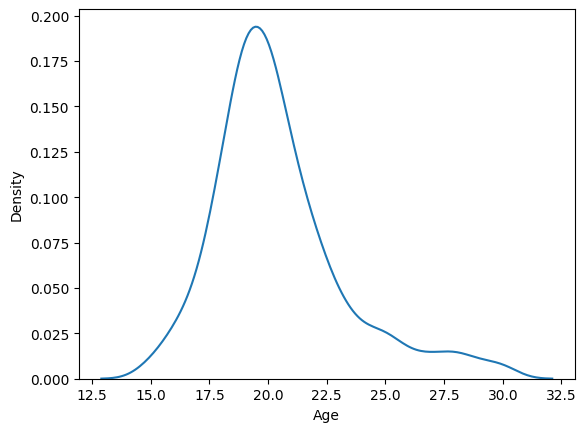

In [ ]:
import seaborn as sns

sns.kdeplot(data=responses_df, x="Age")

<Axes: xlabel='Age', ylabel='Density'>

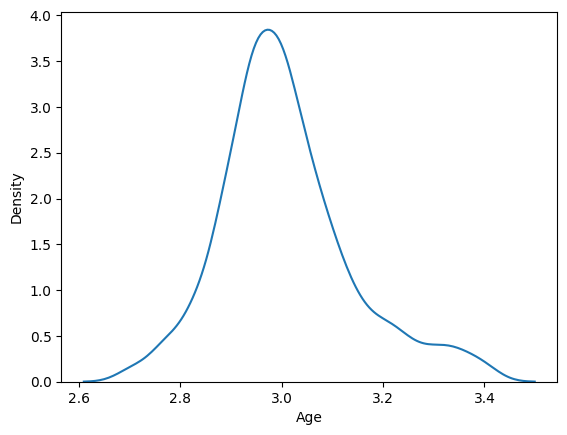

In [ ]:
import numpy as np

# Apply log transformation to the data
log_data = np.log(responses_df.Age)
sns.kdeplot(data=log_data)

## Преобразование Бокса-Кокса

Преобразование Бокса-Кокса — это более гибкий метод преобразования данных, который включает лог-трансформацию как частный случай. Оно применяется для стабилизации дисперсии и приближения распределения данных к нормальному.

Формула:
Преобразование определяется следующей формулой:

$$𝑥′ = \begin{cases}
  \frac{𝑥^𝜆−1}{𝜆},  𝜆≠0 \\
  log(𝑥), 𝜆=0
\end{cases}
$$

Здесь
$λ$ — параметр, который регулирует степень преобразования. Обычно значение
$λ$ подбирается на основе данных для достижения наилучшего результата (максимальной нормальности данных).

Когда используется:
- Когда простая лог-трансформация недостаточна для нормализации данных.
- В случае, если данные содержат нулевые или отрицательные значения (поскольку логарифм требует положительных значений, преобразование Бокса-Кокса более универсально).
- В статистических моделях для стабилизации дисперсии и улучшения точности предсказания.

<Axes: ylabel='Density'>

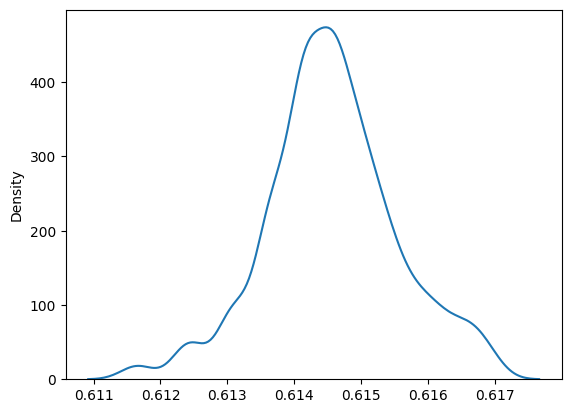

In [ ]:
from scipy.stats import boxcox

boxcox_data = boxcox(responses_df.Age)
sns.kdeplot(data=boxcox_data[0])

# Нормализация данных

Необходимость шкалирования вызвана тем, что разные признаки обучающего набора данных могут быть представлены в разных масштабах и изменяться в разных диапазонах. Например, возраст, который изменяется от 0 до 100, и доход, изменяющийся от нескольких тысяч до нескольких миллионов. То есть диапазоны изменения признаков «Возраст» и «Доход» различаются в тысячи раз.

В этом случае возникает нарушение баланса между влиянием входных переменных, представленных в разных масштабах.

![](https://bigdataschool.ru/wp-content/uploads/2020/10/e00b424fd21a4f6f0091c7c1003453a8.jpg)

Создадим мини-версию датафрейма с описанием человека:

In [ ]:
df_person = responses_df[[
    'Age',
    'Weight',
    'Height',
    'Left - right handed',
    'Only child',
    'Education',
    'Gender'
]]

df_person.Age = boxcox_data[0]

<ipython-input-60-f7ed38b7f18c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person.Age = boxcox_data[0]


Закодируем:

In [ ]:
child_encoder = LabelEncoder()
education_encoder = OrdinalEncoder(categories = [['currently a primary school pupil', 'primary school', 'secondary school', 'college/bachelor degree',
                                                  'masters degree', 'doctorate degree']])
hand_encoder = LabelEncoder()
gender_encoder = LabelEncoder()

df_person['Only child'] = child_encoder.fit_transform(df_person['Only child'])
df_person['Education'] = education_encoder.fit_transform(df_person['Education'].to_numpy().reshape(-1, 1))
df_person['Left - right handed'] = hand_encoder.fit_transform(df_person['Left - right handed'])
df_person['Gender'] = gender_encoder.fit_transform(df_person['Gender'])

<ipython-input-61-360a56cb23c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['Only child'] = child_encoder.fit_transform(df_person['Only child'])
<ipython-input-61-360a56cb23c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_person['Education'] = education_encoder.fit_transform(df_person['Education'].to_numpy().reshape(-1, 1))
<ipython-input-61-360a56cb23c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Посмотрим на кодирование. 0 соответствует женщине, 1 — мужчине.

In [ ]:
gender_encoder.classes_

array(['female', 'male'], dtype=object)

Датафрейм после кодирования:

In [ ]:
df_person.head()

,Age,Weight,Height,Left - right handed,Only child,Education,Gender
0,0.614562,48.0,163.0,1,0,3.0,0
1,0.614138,58.0,163.0,1,0,3.0,0
2,0.614562,67.0,176.0,1,0,2.0,0
3,0.615264,59.0,172.0,1,1,3.0,0
4,0.614562,59.0,170.0,1,0,2.0,0


## Минимаксная нормализация (MinMax Scaling)

Нормализация масштабирует набор данных таким образом, чтобы каждое значение находилось в диапазоне от 0 до 1.

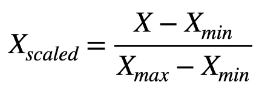

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# инициализируем скейлер
minmax_scaler = MinMaxScaler()

# копируем датасет person
norm_df = df_person.copy()

# собираем названия колонок
cols = norm_df.columns

# нормализуем каждую колонку и заполняем ими датафрейм
norm_df[cols] = minmax_scaler.fit_transform(norm_df[cols])
norm_df

,Age,Weight,Height,Left - right handed,Only child,Education,Gender
0,0.551680,0.056452,0.716312,1.0,0.0,0.6,0.0
1,0.471105,0.137097,0.716312,1.0,0.0,0.6,0.0
2,0.551680,0.209677,0.808511,1.0,0.0,0.4,0.0
3,0.684786,0.145161,0.780142,1.0,1.0,0.6,0.0
4,0.551680,0.145161,0.765957,1.0,0.0,0.4,0.0
...,...,...,...,...,...,...,...
1005,0.551680,0.129032,0.723404,1.0,0.0,0.4,0.0
1006,0.910068,0.314516,0.858156,0.0,0.0,0.8,1.0
1007,0.378631,0.274194,0.787234,1.0,1.0,0.4,0.0
1008,0.834005,0.137097,0.787234,1.0,0.0,0.6,0.0


## Стандартизация (z-score нормализация)

Стандартизация приводит все исходные значения набора данных к набору значений с нулевым средним и стандартным отклонением, равным 1.

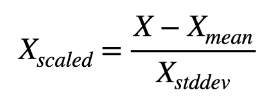

In [ ]:
from sklearn.preprocessing import StandardScaler

# инициализируем скейлер
std_scaler = StandardScaler()

# копируем датасет person
std_df = df_person.copy()

# собираем названия колонок
cols = std_df.columns

# стандартизируем каждую колонку и заполняем ими датафрейм
std_df[cols] = std_scaler.fit_transform(std_df[cols])
std_df

,Age,Weight,Height,Left - right handed,Only child,Education,Gender
0,0.007072,-1.336817,-1.051350,0.333333,-0.579637,0.912374,-0.828338
1,-0.427628,-0.607887,-1.051350,0.333333,-0.579637,0.912374,-0.828338
2,0.007072,0.048149,0.254979,0.333333,-0.579637,-0.365709,-0.828338
3,0.725170,-0.534994,-0.146969,0.333333,1.725218,0.912374,-0.828338
4,0.007072,-0.534994,-0.347942,0.333333,-0.579637,-0.365709,-0.828338
...,...,...,...,...,...,...,...
1005,0.007072,-0.680780,-0.950864,0.333333,-0.579637,-0.365709,-0.828338
1006,1.940556,0.995758,0.958387,-3.000000,-0.579637,2.190457,1.207237
1007,-0.926524,0.631293,-0.046482,0.333333,1.725218,-0.365709,-0.828338
1008,1.530200,-0.607887,-0.046482,0.333333,-0.579637,0.912374,-0.828338


# Дисбаланс классов

Несбалансированность классов как правило создаёт проблемы при решении задач классификации, поскольку построенные на таких данных модели имеют «перекос» в сторону мажоритарного класса, т.е. с большей вероятностью присваивают его метку класса новым наблюдениям при практическом использовании модели.

Существует три способа сбалансировать данные: сгенерировать искусственные образцы наименьшего класса (over-sampling), сократить количество экземпляров наибольшего класса (under-sampling), и, наконец, объединить оба этих метода вместе.

Далее рассмотрим основных представителей алгоритмов балансировки данных из библиотеки *imblearn*.

Попробуем простую теорию: можно ли по росту и весу угадать пол человека. Рост и вес - признаки, гендер - таргет.

Посмотрим на то, являются ли наши классы несбалансированными. Для этого подсчитает количество респондентов женского и мужского пола из Gender. 599 записей соответствует женщинам, 411 - мужчинам.

In [ ]:
person_normalized_df = norm_df.copy()

In [ ]:
target_count = person_normalized_df.Gender.value_counts()
target_count

,count
Gender,
0.0,599
1.0,411


Class 0: 599
Class 1: 411
Proportion: 1.46 : 1


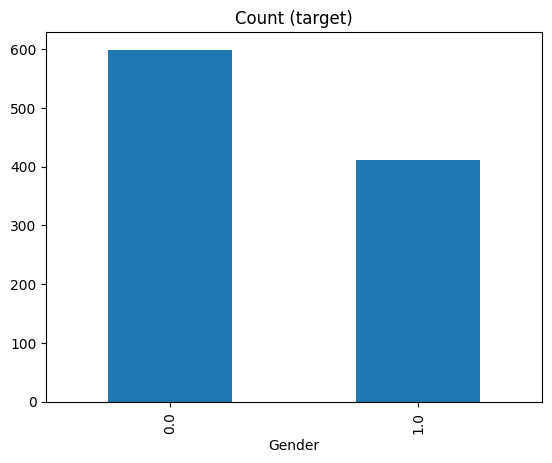

In [ ]:
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Посмотрим на то, как располагаются точки относительно роста-веса.

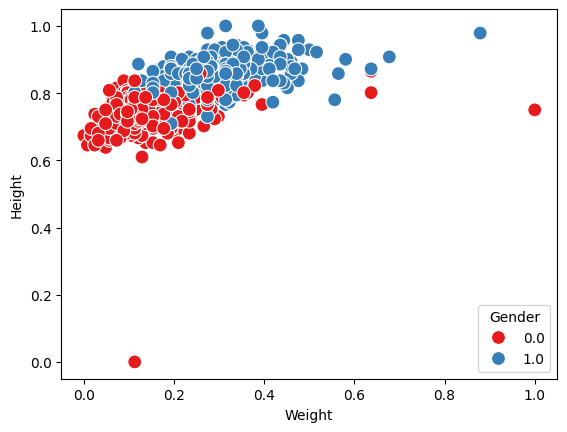

In [ ]:
sns.scatterplot(data=person_normalized_df, x="Weight", y="Height", hue=person_normalized_df.Gender, palette='Set1', s=100);

# Сокращение размерности: кратко

Oversampling и undersampling — это методы, используемые для борьбы с дисбалансом классов в задаче классификации, когда количество наблюдений одного класса значительно превышает количество наблюдений другого. Например, в задаче бинарной классификации один класс может встречаться гораздо чаще, чем другой, что приводит к тому, что модель учится игнорировать менее представленный класс.

**Oversampling** — это техника увеличения количества наблюдений менее представленного класса путем их дублирования или генерации новых.

**Undersampling** — это метод, при котором количество наблюдений более представленного класса уменьшается для достижения баланса.


Подробнее: https://loginom.ru/blog/imbalance-class

<figure>

<img src='https://miro.medium.com/v2/resize:fit:1200/1*0jwntVGaj7qQkr-MeueQcQ.jpeg' height="400" />
<figcaption>Различия SMOTE и ADASYN</figcaption>
</figure>

## Oversampling: SMOTE

Рассмотрим обогащение с помощью SMOTE алгоритма и его вариации SMOTENC из бибилиотеки imblearn.

Метод увеличения числа примеров миноритарного класса (Synthetic Minority Over-sampling Technique, SMOTE) — это алгоритм предварительной обработки данных, используемый для устранения дисбаланса классов в наборе данных. В основе алгоритма лежит идея генерации некоторого количества искусственных наблюдений, которые были бы «похожи» на наблюдения, имеющиеся в миноритарном классе, но при этом не дублировали их.

> Недостатком данного подхода является то, что алгоритм просто увеличивает плотность наблюдений в областях векторного пространства, «населённых» преимущественно миноритарным классом. Т.е. работает эффективно, когда такие области имеются. Если же примеры миноритарного класса расположены равномерно, то в результате только увеличивается перемешивание классов, что затрудняет классификацию.

SMOTENC - вариация SMOTE, которая может работать как с числовыми, так и с категориальными признаками.

In [ ]:
!pip install imbalanced-learn -q

In [ ]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(random_state=42, k_neighbors=5, categorical_features=[3,4,5])

responses_X_smoted, responses_Y_smoted = smote.fit_resample(person_normalized_df.drop('Gender', axis=1), person_normalized_df['Gender'])

columns = list(person_normalized_df.columns)

resampled_df = pd.DataFrame(data=responses_X_smoted, columns=columns[:-1])
resampled_df[columns[-1]] = responses_Y_smoted
resampled_df

,Age,Weight,Height,Left - right handed,Only child,Education,Gender
0,0.551680,0.056452,0.716312,1.0,0.0,0.6,0.0
1,0.471105,0.137097,0.716312,1.0,0.0,0.6,0.0
2,0.551680,0.209677,0.808511,1.0,0.0,0.4,0.0
3,0.684786,0.145161,0.780142,1.0,1.0,0.6,0.0
4,0.551680,0.145161,0.765957,1.0,0.0,0.4,0.0
...,...,...,...,...,...,...,...
1193,0.622374,0.303532,0.839753,1.0,1.0,0.4,1.0
1194,0.471105,0.314516,0.836879,1.0,0.0,0.4,1.0
1195,0.910831,0.316018,0.857991,1.0,0.0,0.8,1.0
1196,0.471105,0.267625,0.814800,1.0,0.0,0.4,1.0


Class 0: 599
Class 1: 599
Proportion: 1.0 : 1


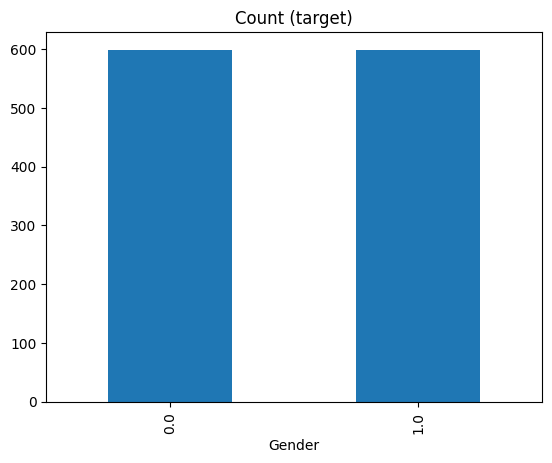

In [ ]:
target_count = resampled_df.Gender.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Обучающие данные до и после применения SMOTE


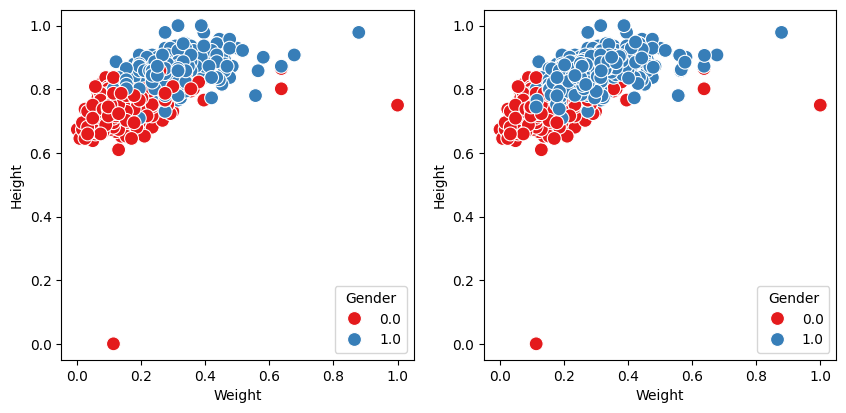

In [ ]:
import matplotlib.pyplot as plt

print('Обучающие данные до и после применения SMOTE')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=person_normalized_df, x="Weight", y="Height", hue=person_normalized_df.Gender, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=resampled_df, x="Weight", y="Height", hue=resampled_df.Gender, palette='Set1', s=100);

## Oversampling: ADASYN
Идея ADASYN заключается в том, что не все образцы недопредставленных классов одинаковы. Некоторые из них сложнее классифицировать, чем другие. ADASYN фокусируется на создании синтетических образцов для более сложных образцов, чтобы улучшить производительность классификации для этих классов.
Сложные образцы - это образцы, которые трудно классифицировать. Они могут быть расположены на границе между классами или иметь другие особенности, которые затрудняют их классификацию.

Наблюдения, расположенные вблизи границ классов обычно «перемешаны» с наблюдениями соседнего класса, поэтому алгоритму обучения сложнее их распознать. Тогда при оверсэмплинге для таких примеров логично генерировать больше искусственных наблюдений, чтобы сделать границу класса более чёткой. На этом принципе и основана работа алгоритма ADASYN.

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()

responses_X_adasyn, responses_Y_adasyn = adasyn.fit_resample(person_normalized_df.drop('Gender', axis=1), person_normalized_df['Gender'])

columns = list(person_normalized_df.columns)

resampled_df_adasyn = pd.DataFrame(data=responses_X_adasyn, columns=columns[:-1])
resampled_df_adasyn[columns[-1]] = responses_Y_adasyn


Class 0: 599
Class 1: 562
Proportion: 1.07 : 1


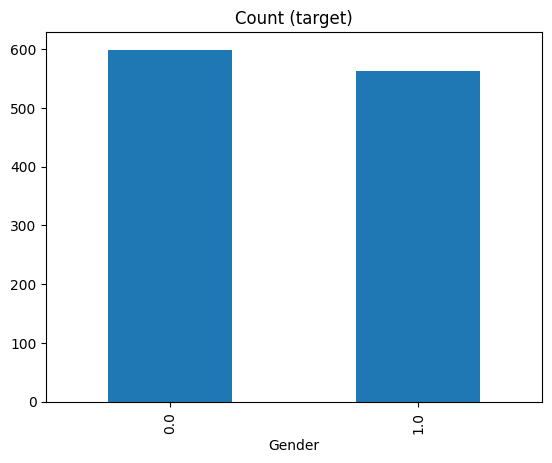

In [ ]:
target_count = resampled_df_adasyn.Gender.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Обучающие данные до и после применения ADASYN


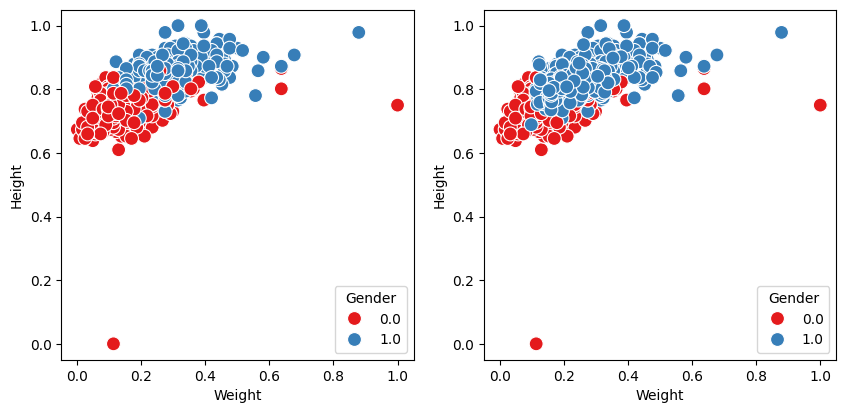

In [ ]:
print('Обучающие данные до и после применения ADASYN')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=person_normalized_df, x="Weight", y="Height", hue=person_normalized_df.Gender, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=resampled_df_adasyn, x="Weight", y="Height", hue=resampled_df_adasyn.Gender, palette='Set1', s=100);

## Undersampling: Tomek Links

Алгоритм TomekLinks направлен на удаление экземпляров отрицательного класса, находящихся среди положительных экземпляров. Его бесполезно применять тогда, когда кластеры разных классов хорошо разделены, но если данные перемешаны, TomekLinks отчасти пособен поправить ситуацию.

![](https://loginom.ru/sites/default/files/blogpost-files/tomek-links.svg)

In [ ]:
from imblearn.under_sampling import TomekLinks

undersampling_tomek = TomekLinks(sampling_strategy='majority')

responses_X_tomek, responses_Y_tomek = undersampling_tomek.fit_resample(person_normalized_df.drop('Gender', axis=1), person_normalized_df['Gender'])

columns = list(person_normalized_df.columns)

resampled_df_tomek = pd.DataFrame(data=responses_X_tomek, columns=columns[:-1])
resampled_df_tomek[columns[-1]] = responses_Y_tomek

Судя по тому, что у мажоритарного класса алгоритм удалил 13 записей, то алгоритм считает кластеры отделимыми.

Class 0: 550
Class 1: 411
Proportion: 1.34 : 1


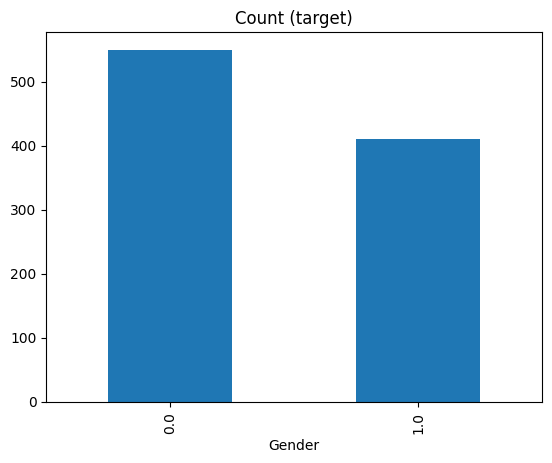

In [ ]:
target_count = resampled_df_tomek.Gender.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Обучающие данные до и после применения TomekLinks


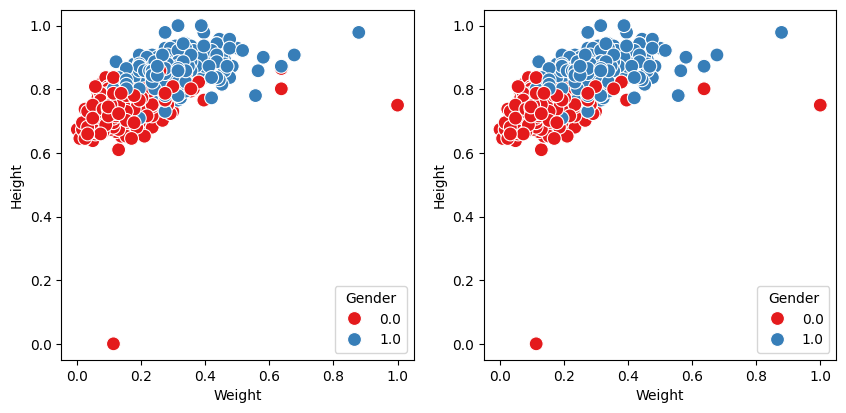

In [ ]:
print('Обучающие данные до и после применения TomekLinks')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=person_normalized_df, x="Weight", y="Height", hue=person_normalized_df.Gender, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=resampled_df_tomek, x="Weight", y="Height", hue=resampled_df_tomek.Gender, palette='Set1', s=100);

## Undersampling: Condensed Nearest Neighbor Rule

В исходном датасете будут перемещены все наблюдения мажоритарного класса, для которых ближайшим соседом будет наблюдение другого класса. Процесс будет идти до тех пор, пока в исходном наборе не закончатся наблюдения доминирующего класса, близкие к наблюдениям другого класса.

![](https://loginom.ru/sites/default/files/blogpost-files/cnnr-sampling.svg)

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

undersampling_cnn = CondensedNearestNeighbour(sampling_strategy='auto')

responses_X_cnn, responses_Y_cnn = undersampling_cnn.fit_resample(person_normalized_df.drop('Gender', axis = 1), person_normalized_df['Gender'])

columns = list(person_normalized_df.columns)

resampled_df_cnn = pd.DataFrame(data=responses_X_cnn, columns=columns[:-1])
resampled_df_cnn[columns[-1]] = responses_Y_cnn

Class 0: 169
Class 1: 411
Proportion: 0.41 : 1


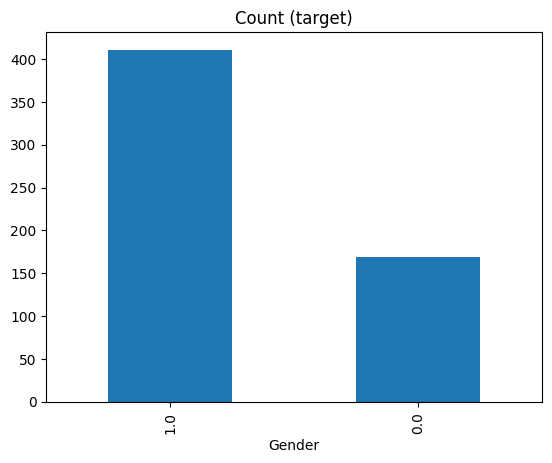

In [ ]:
target_count = resampled_df_cnn.Gender.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Обучающие данные до и после применения CondensedNearestNeighbour


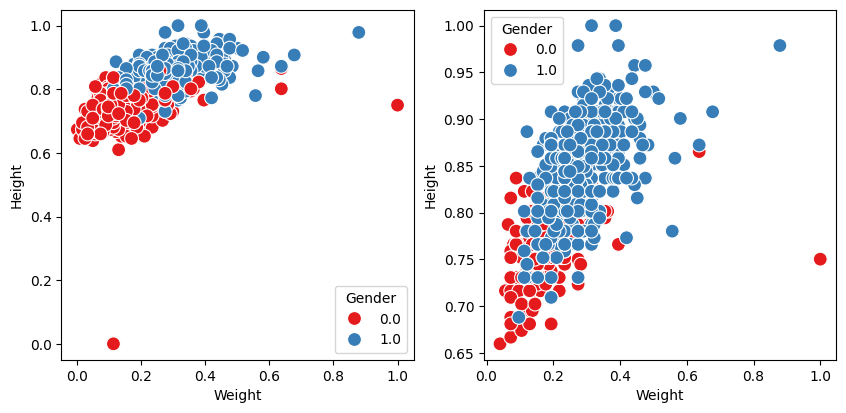

In [ ]:
print('Обучающие данные до и после применения CondensedNearestNeighbour')
figure = plt.figure(figsize=(10,10))

ax_1 = figure.add_subplot(2, 2, 1)
sns.scatterplot(data=person_normalized_df, x="Weight", y="Height", hue=person_normalized_df.Gender, palette='Set1', s=100);
ax_2 = figure.add_subplot(2, 2, 2)
sns.scatterplot(data=resampled_df_cnn, x="Weight", y="Height", hue=resampled_df_cnn.Gender, palette='Set1', s=100);

# Циклические признаки

Циклические функции, такие как атрибуты времени (например, месяцы, дни, дни недели, часы, минуты и секунды), демонстрируют циклические закономерности и требуют специального кодирования, чтобы обеспечить ясность их циклической природы. Ведь в простой записи те же часы 24:00 и 1:00 (час ночи) для человека похожи, ведь мы знаем, что час ночи от полуночи недалеко. Однако алгоритмы видят 24 и 1 в порядковой шкале и разницу между ними как 23.

Вспомним наш игрушечный пример с датами. Ожидаемое поведение - этот цикл повторяется.

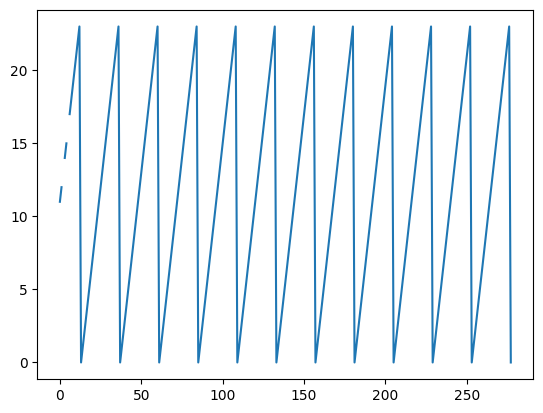

In [ ]:
df_with_dates['hour'] = df_with_dates.Date.dt.hour
ax = df_with_dates['hour'].plot()

Кодирование можно делать на основе синуса и косинуса:

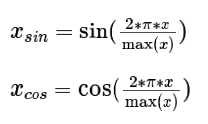

In [ ]:
df_with_dates['hour_sin'] = numpy.sin(2 * numpy.pi * df_with_dates['hour']/24.0)
df_with_dates['hour_cos'] = numpy.cos(2 * numpy.pi * df_with_dates['hour']/24.0)

 Вот что произойдет, если мы нарисуем диаграмму рассеяния как синусоидальных, так и косинусоидальных столбцов:

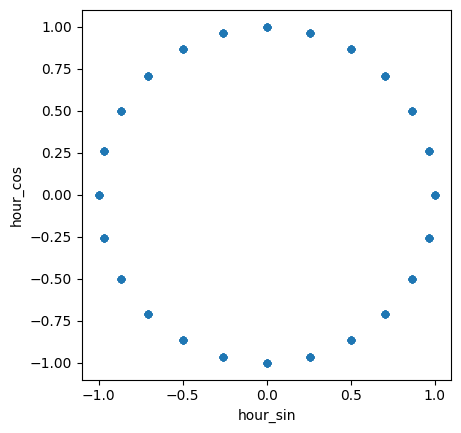

In [ ]:
ax = df_with_dates.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

Аналогичное можно делать для любых циклических признаков.

# Feature Selection

## Методы-фильтры (Filter Methods)

**Фильтрационные методы используют статистические критерии** для отбора признаков, независимо от модели. Эти методы работают на уровне предобработки данных, отбирая признаки до того, как будет построена модель. Признаки оцениваются на основе их собственной значимости, например, взаимосвязи с целевой переменной, а не на основе результатов модели.

**Примеры**: хи-квадрат, линейная корреляция, $\phi_k$-корреляция, взаимная информация, information gain (информационный прирост) и др.

### Хи-квадрат


Хи-квадрат - статистический тест, который измеряет зависимость между **категориальными** переменными и позволяет отсеять признаки, которые с наибольшей вероятностью не зависят от целевой функции и поэтому не являются информативными для классификации. Если ваши данные непрерывны, то их необходимо дискретизировать перед подачей в тест, чтобы все признаки и таргет были категориальными.

SelectKBest в сочетании с хи-квадрат тестом выдает признаки, которые ***являются*** информативными.
Однако вам необходимо указать количество признаков k.

В качестве целевой возьмем пол (gender).

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# берем категориальные по человеку
df_person_categorical = df_person[['Left - right handed',
                                'Only child',
                                'Education']]
# добавляем столбцы-опросники с баллами
df_preferences = responses_df.iloc[:, 35:50]
df_person_categorical = pd.concat([df_person_categorical, df_preferences], axis=1)
print(f'Количество категориальных переменных: {len(df_person_categorical.columns)}')

# выделяем таргет и ищем наиболее значимые
y = df_person[['Gender']]
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(df_person_categorical, y)
print(f'После chi2: {selector.get_feature_names_out()}')

Количество категориальных переменных: 18
После chi2: ['Physics' 'PC' 'Reading' 'Cars' 'Art exhibitions']


In [ ]:
# сохраняем список пар-кортежей - признак и его оценка
feature_scores = list(zip(df_person_categorical.columns, selector.scores_))
# сортируем по убыванию
feature_scores.sort(key=lambda x: x[1], reverse=True)

for feature, score in feature_scores:
  print(f'{feature}: {score}')

Cars: 149.74157155265178
PC: 120.22491535035587
Reading: 95.12376631510128
Physics: 67.75030283408634
Art exhibitions: 32.15678089210846
Biology: 19.784086349825785
Foreign languages: 16.015170029139583
Medicine: 12.7828180456642
Internet: 5.651079204130242
Chemistry: 3.5161599762903113
Countryside, outdoors: 3.387579662823608
Geography: 2.8916044657196807
Economy Management: 2.561074535172542
Religion: 0.7897741547749051
Left - right handed: 0.6455117364662445
Only child: 0.4687422949457266
Education: 0.2500865228521456
Law: 0.022983821013269387


### Взаимная информация

Если у вас смешанные типы признаков, то неплохим вариантом может быть взаимная информация. Методы для классификации и регрессии реализованы в sklearn. Этот метод можно использовать для отбора признаков путем оценки
информационного прироста каждой переменной в контексте целевой переменной.
Оценка равна нулю тогда и только тогда, когда две случайные величины независимы, а более высокие значения означают более высокую зависимость.

In [ ]:
df_person

,Age,Weight,Height,Left - right handed,Only child,Education,Gender
0,0.614562,48.0,163.0,1,0,3.0,0
1,0.614138,58.0,163.0,1,0,3.0,0
2,0.614562,67.0,176.0,1,0,2.0,0
3,0.615264,59.0,172.0,1,1,3.0,0
4,0.614562,59.0,170.0,1,0,2.0,0
...,...,...,...,...,...,...,...
1005,0.614562,57.0,164.0,1,0,2.0,0
1006,0.616451,80.0,183.0,0,0,4.0,1
1007,0.613650,75.0,173.0,1,1,2.0,0
1008,0.616050,58.0,173.0,1,0,3.0,0


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

df_person_extended = pd.concat([df_person, df_preferences], axis=1)
features = df_person_extended.drop('Gender', axis=1)

discrete_cols = list(range(3,21))

print(f'Количество признаков: {len(features.columns)}')

y = df_person_extended.Gender

mi = mutual_info_classif(features, y, discrete_features=discrete_cols)

Количество признаков: 21


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

In [ ]:
# сохраняем список пар-кортеже - признак и его оценка
feature_scores = list(zip(features.columns, mi))
# сортируем по убыванию
feature_scores.sort(key=lambda x: x[1], reverse=True)

for feature, score in feature_scores:
  print(f'{feature}: {score}')

Height: 0.36528357685137025
Weight: 0.33282956216032766
PC: 0.12439897811405023
Cars: 0.10479635779031686
Reading: 0.07597885175941425
Physics: 0.051191456309200384
Foreign languages: 0.032925804173890905
Art exhibitions: 0.032767964935518396
Age: 0.028305603518627986
Internet: 0.02194497841742557
Biology: 0.02185215374065659
Medicine: 0.01590463674379356
Chemistry: 0.015265039414342915
Geography: 0.014819641205208064
Countryside, outdoors: 0.013441259216784712
Religion: 0.011140975180071247
Economy Management: 0.009407099534005835
Education: 0.006702768284586966
Law: 0.005448625140322766
Left - right handed: 0.003138716448319978
Only child: 0.00031121792061641895


## Методы-обертки

Методы-обертки для отбора признаков (**wrapper method**s) — это группа методов отбора признаков (фич), которые строят модели и оценивают их качество для каждой комбинации признаков, с целью найти наиболее значимые из них.

Можно использовать SequentialFeatureSelector из sklearn.

Идея SequentialFeatureSelector  заключается в формировании множества значимых признаков путем последовательного добавления по одному наиболее эффективному.
То есть сначала работа модели тестируется на каждом отдельном признаке и выбирается максимизирующий выбранную оценку, затем добавляется еще один, такой, что на паре модель дает лучшую оценку и так далее до достижения заданного количества признаков.

Есть и последовательное удаление до заданного количества (backward feature selection), для этого в обертку необходимо передать параметр direction="backward".

Однако есть нюанс - вам явно нужно указать количество признаков. И для подбора можете организовать цикл перебора количества признаков с выводом метрик модели.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# инициализируем классификатор
classifier = SGDClassifier()
# собираем таргет
y = df_person_extended.Gender

# инициализируем обертку, указываем количество признаков и обучаем классификатор
sfs = SequentialFeatureSelector(classifier, n_features_to_select=10)
sfs.fit(features, y)

# смотрим на признаки
sfs.get_feature_names_out()

array(['Weight', 'Physics', 'Internet', 'Economy Management', 'Chemistry',
       'Reading', 'Foreign languages', 'Law', 'Cars', 'Art exhibitions'],
      dtype=object)

## CatBoost и RFE

Определять важность признаков можно и с помощью библиотеки CatBoost, в нем реализован алгоритм RFE (Recursive Feature Elimination), это тоже wrapper-метод. По сути, этот метод обучает модель на исходном количестве признаков, и каждому признаку придается значение. Наименее важные функции исключаются. Этот процесс будет повторяться рекурсивно о тех пор, пока не будет получено оптимальное число признаков. В итоге сможем посмотреть признаки, которые сильнее всего коррелируют с целевой переменной.


In [ ]:
!pip install catboost -q
import catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


Подготовим наши данные: выберем принаки, с которыми будем работать, дискретизируем цену (чтобы была задача классификации, а не регрессии), выявляем категориальные признаки и если они в числах, то приводим к типу int (требование бибилиотеки). Как можете заметить, CatBoost может работать с признаками в текстовом формате: признаки 'TYPE', 'LOCALITY',	'SUBLOCALITY' мы не преобразовывали с помощью One-Hot Encoding'a.

In [ ]:
features

,Age,Weight,Height,Left - right handed,Only child,Education,Physics,Internet,PC,Economy Management,...,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors"
0,0.614562,48.0,163.0,1,0,3.0,3.0,5.0,3.0,5.0,...,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0
1,0.614138,58.0,163.0,1,0,3.0,2.0,4.0,4.0,5.0,...,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0
2,0.614562,67.0,176.0,1,0,2.0,2.0,4.0,2.0,4.0,...,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0
3,0.615264,59.0,172.0,1,1,3.0,1.0,3.0,1.0,2.0,...,3.0,5.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,1.0
4,0.614562,59.0,170.0,1,0,2.0,2.0,2.0,2.0,2.0,...,3.0,5.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,0.614562,57.0,164.0,1,0,2.0,2.0,4.0,3.0,1.0,...,1.0,5.0,4.0,5.0,2.0,1.0,1.0,5.0,1.0,2.0
1006,0.616451,80.0,183.0,0,0,4.0,4.0,5.0,5.0,2.0,...,1.0,1.0,2.0,2.0,1.0,1.0,5.0,1.0,5.0,5.0
1007,0.613650,75.0,173.0,1,1,2.0,1.0,3.0,4.0,1.0,...,1.0,4.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0
1008,0.616050,58.0,173.0,1,0,3.0,1.0,5.0,4.0,3.0,...,3.0,2.0,5.0,5.0,3.0,1.0,1.0,5.0,1.0,5.0


In [ ]:
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split

# Х и Y наборы, делим данные по бинам
X = features
y = df_person_extended.Gender

# указываем колько категориальные признаки и приводим в тип int числовые
cat_cols = list(features.iloc[:, 3:].columns)
X[cat_cols] = X[cat_cols].astype(int)

Обучаем модель классификатора CatBoostClassifier. И сразу можем вывести влияние признаков (указано в процентах):

In [ ]:
from catboost import Pool
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создаем обучающий и тестовый наборы данных
train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
test_data = Pool(data=X_test, label=y_test, cat_features=cat_cols)

# инстанциируем модель, указываем метрики, передаем категориальные признаки
model = CatBoostClassifier(random_state=42, custom_metric=['Accuracy', 'Precision', 'Recall', 'F1'], verbose=False,
                           cat_features=cat_cols,
                           thread_count=-1)
# обучаем модель
model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          plot=False,
          cat_features=cat_cols,
          early_stopping_rounds=10)

# посмотрим на важность признаков катбуста
fi = model.get_feature_importance(prettified=True)
fi

,Feature Id,Importances
0,Height,23.591748
1,Weight,19.893377
2,PC,9.625278
3,Reading,9.470461
4,Cars,6.979992
5,Physics,5.875739
6,"Countryside, outdoors",3.030511
7,Foreign languages,2.925228
8,Economy Management,2.438281
9,Chemistry,2.426480


А также можем посмотреть на метрики мультиклассовой классификации

In [ ]:
model.get_best_score()

{'learn': {'Recall': 0.9544072948328267,
  'Accuracy': 0.9715346534653465,
  'F1': 0.9646697388632872,
  'Logloss': 0.11309958112150323,
  'Precision': 0.9751552795031055},
 'validation': {'Recall': 0.9024390243902439,
  'Accuracy': 0.9207920792079208,
  'F1': 0.9024390243902439,
  'Logloss': 0.21738655618437105,
  'Precision': 0.9090909090909091}}

Можем визуализировать важность признаков в порядке убывания. По вертикали название признака, по горизонтали - его значимость в процентах.

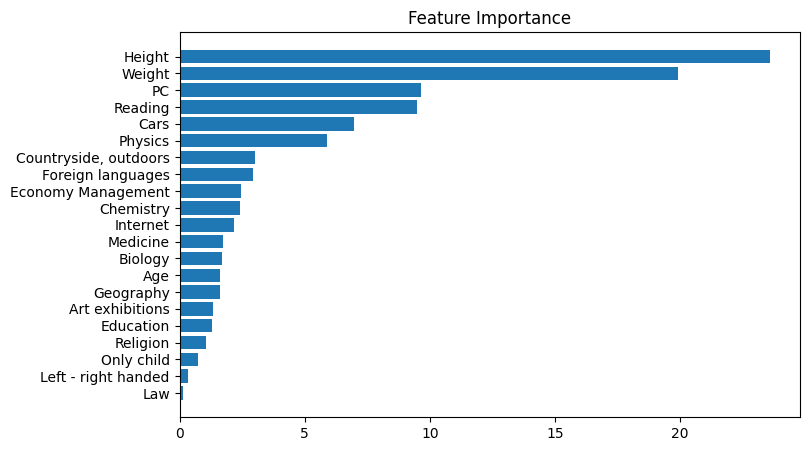

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

# Сокращение размерности: кратко

## PCA

Этот метод активно используется в анализе данных для понижения размерности исходных данных и выявления наиболее важных (информативных) признаков. Следует помнить, что Метод главных компонент работает только с самими признаками, а не "ответами", поэтому он не учитывает влияние признака на "ответ".

Прекрасная статья на понятных примерах: https://vk.com/@itresume-metod-glavnyh-komponent-poshagovaya-instrukciya

In [ ]:
from sklearn.preprocessing import StandardScaler

columns = ['Height', 'Weight', 'Age', 'Spending on healthy eating', 'Finances', 'Gender']

pca_df = responses_df.loc[:, columns].copy()
pca_df = pca_df.dropna()

# Separating out the features
x = pca_df.loc[:, columns[:-1]]

# Separating out the target
y = pca_df.loc[:,['Gender']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

# оставим 5 компонент, как сейчас 5 признаков
pca = PCA()
pca.fit_transform(x)

array([[ 1.65481866e+00, -1.73683419e-01,  4.36803550e-01,
         4.10917579e-01, -2.13967095e-01],
       [ 1.29791898e+00, -6.57257520e-01,  1.22944629e+00,
         1.01092344e-03,  3.71981049e-01],
       [-2.34174182e-01, -1.27113604e+00,  1.08956044e+00,
         2.54467201e-01, -1.02893460e-01],
       ...,
       [-4.38861936e-01, -1.39773842e+00, -1.87444704e+00,
         3.03617965e-01,  5.62044409e-01],
       [-3.11670348e-02,  6.75819044e-01,  8.32381560e-01,
         1.33398429e+00, -6.10968823e-01],
       [-8.98567550e-01,  1.78610342e+00, -7.86952709e-01,
        -1.18925743e+00, -5.31039631e-01]])

При этом можно посмотреть как выглядит вклад каждой из компонент в разброс исходных данных (умножаем на 100 для процентов):
Можно заметить, что покрытие идет 35% - от одной компоненты, еще 20% - от двух, и т.д.

In [ ]:
pca.explained_variance_ratio_

array([0.35524861, 0.20697995, 0.19903029, 0.17645058, 0.06229057])

Можно визуализировать на графике, какой процент покрытия данных будет при разном количестве компонент (процент дисперсии, объясняемый каждым из выбранных компонентов.). При 4-х - 94%. Чем больше, конечно, тем лучше, количество компонент аналитик выбираем сам.

[0.0, 0.3552486092787827, 0.562228559777025, 0.7612588468571174, 0.9377094277327157, 1.0]


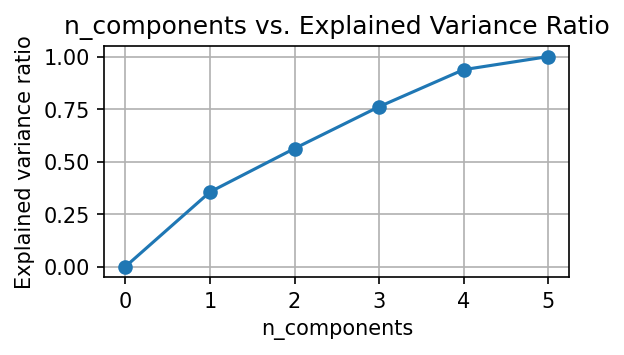

In [ ]:
# от 0 до 5-ти компонент оставляем
nums = range(6)

# подсчитываем сумму вкладов при разном количестве компонент
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(x)
  var_ratio.append(numpy.sum(pca.explained_variance_ratio_))

import matplotlib.pyplot as plt

# визуализируем
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

print(var_ratio)

График выше иллюстрирует кумулятивное отношение объясненной дисперсии по числу главных компонентов. Каждая точка на кривой представляет собой кумулятивную долю общей дисперсии, объясненной по мере того, как мы постепенно добавляем главные компоненты. Эта визуализация может помочь в определении оптимального числа главных компонентов для сохранения, уравновешивая цель снижения размерности с сохранением достаточного количества информации из исходного набора данных.

## UMAP

In [ ]:
!pip install umap-learn -q

In [ ]:
import umap

umap_data = umap.UMAP(n_components=3, n_neighbors=100, random_state=42).fit(x)

In [ ]:
y = person_normalized_df.Gender

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=umap_data.embedding_[:, 0], y=umap_data.embedding_[:, 1], z=umap_data.embedding_[:, 2],
              color=y)
fig.show()

# Пример с датами

In [ ]:
import numpy
from datetime import datetime, timedelta


# Генерация дат в диапазоне с 07.01.2024 по 13.01.2024
start_date = datetime(2024, 1, 1, 11, 0, 0)
end_date = datetime(2024, 1, 13, 0, 0, 0)
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Создание DataFrame
df_with_dates = pd.DataFrame({'Date': date_range})
# Искусственное добавление NaN в дату для примера
df_with_dates.loc[[2, 5], 'Date'] = numpy.nan

# Добавление признака "День недели"
df_with_dates['Weekday'] = df_with_dates['Date'].dt.day_name()
df_with_dates

,Date,Weekday
0,2024-01-01 11:00:00,Monday
1,2024-01-01 12:00:00,Monday
2,NaT,NaN
3,2024-01-01 14:00:00,Monday
4,2024-01-01 15:00:00,Monday
...,...,...
273,2024-01-12 20:00:00,Friday
274,2024-01-12 21:00:00,Friday
275,2024-01-12 22:00:00,Friday
276,2024-01-12 23:00:00,Friday
